## About Dataset

This dataset has data on orders placed by customers on supermart grocery store.

## Objective

Perform exploratory data analysis to discover any insights and patterns

### Importing Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import calendar

### Importing the data

In [2]:
data = pd.read_csv(r"F:\data science course\Project capstone\Batch b datasets\Supermart_sales.csv")

In [3]:
supermart = data.copy()
supermart.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


## Data Cleaning and Manipulation

 Renaming columns to eliminate empty space in between column names

In [4]:
rename_column = {'Order ID':'order_id', 'Customer Name':'customer_name', 'Category':'category', 'Sub Category':'sub_category',
                'City':'city', 'Order Date':'order_date', 'Region':'region', 'Sales':'sales_price', 'Discount':'discount',
                'Profit':'profit', 'State':'state'}
supermart = supermart.rename(columns = rename_column)

In [5]:
supermart.head()

,order_id,customer_name,category,sub_category,city,order_date,region,sales_price,discount,profit,state
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


#### Checking null values

In [6]:
supermart.isnull().sum()

order_id         0
customer_name    0
category         0
sub_category     0
city             0
order_date       0
region           0
sales_price      0
discount         0
profit           0
state            0
dtype: int64

#### Checking duplicate rows

In [7]:
supermart.duplicated().sum()

0

#### Checking negative values

In [8]:
(supermart._get_numeric_data() < 0).sum()

sales_price    0
discount       0
profit         0
dtype: int64

In [9]:
supermart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9994 non-null   object 
 1   customer_name  9994 non-null   object 
 2   category       9994 non-null   object 
 3   sub_category   9994 non-null   object 
 4   city           9994 non-null   object 
 5   order_date     9994 non-null   object 
 6   region         9994 non-null   object 
 7   sales_price    9994 non-null   int64  
 8   discount       9994 non-null   float64
 9   profit         9994 non-null   float64
 10  state          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


#### Changing the order date column to datetime Dtype

In [10]:
supermart['order_date'] = pd.to_datetime(supermart['order_date'])

#### Creating extra columns for month and year

In [11]:
supermart['month_name'] = [calendar.month_abbr[num] for num in supermart['order_date'].dt.month]
supermart['month'] = supermart['order_date'].dt.month
supermart['year'] = supermart['order_date'].dt.year

In [12]:
supermart.head(3)

,order_id,customer_name,category,sub_category,city,order_date,region,sales_price,discount,profit,state,month_name,month,year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,Nov,11,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,Nov,11,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,Jun,6,2017


#### Counting number of unique items in each column

In [13]:
print(supermart.order_id.nunique(),'order_id')
print(supermart.customer_name.nunique(),'customer_name')
print(supermart.category.nunique(),'category')
print(supermart.sub_category.nunique(),'sub_category')
print(supermart.city.nunique(),'city')
print(supermart.region.nunique(),'region')
print(supermart.state.nunique(),'state')
print(supermart.month_name.nunique(),'month_name')
print(supermart.year.nunique(),'year')

9994 order_id
50 customer_name
7 category
23 sub_category
24 city
5 region
1 state
12 month_name
4 year


In [14]:
supermart.year.unique()

array([2017, 2016, 2015, 2018], dtype=int64)

In [15]:
supermart[['sales_price','profit','discount']].sum()

sales_price    14956982.00
profit          3747121.20
discount           2266.81
dtype: float64

In [16]:
supermart.region.value_counts()

West       3203
East       2848
Central    2323
South      1619
North         1
Name: region, dtype: int64

There is only one entry for the North region, so it will be dropped

In [17]:
supermart.drop(supermart[supermart.region == 'North'].index, inplace=True)

In [18]:
supermart.region.value_counts()

West       3203
East       2848
Central    2323
South      1619
Name: region, dtype: int64

## Observations from the data

#### Total orders = 9994
#### Total regions = 5
#### Total cities = 24
#### Total categories = 7
#### Total sub-categories = 23
#### Total customers = 50
#### Total state = 1
#### Total years = 4
#### Total months = 12

## Problem Statements

#### Which category of product is best performing? 

In [19]:
best_category = pd.pivot_table(supermart, index='category', values=['order_id','profit','sales_price'],aggfunc={'order_id':'count','profit':'sum','sales_price':'sum'})
best_category.sort_values('order_id', ascending = False)

,order_id,profit,sales_price
category,,,
Snacks,1514,568178.85,2237546
"Eggs, Meat & Fish",1490,567357.22,2267401
Fruits & Veggies,1418,530400.38,2100727
Bakery,1413,528521.06,2112281
Beverages,1400,525605.76,2085313
Food Grains,1398,529162.64,2115272
Oil & Masala,1360,497494.01,2037188


<AxesSubplot:xlabel='category'>

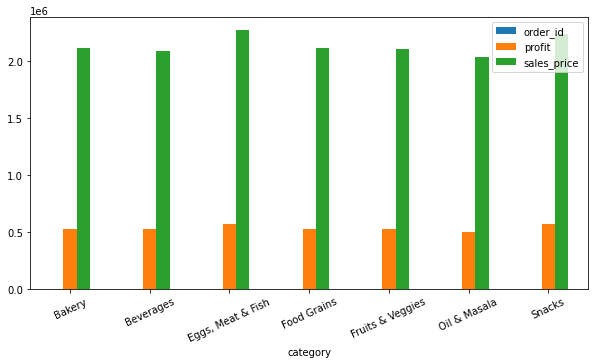

In [20]:
best_category.plot(kind='bar', figsize=(10,5), rot=25)

 We can see that snacks are the most profitable category and also the best performing in terms of sales

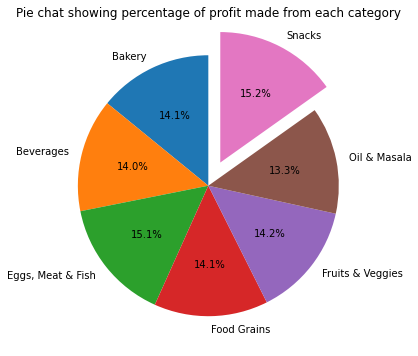

In [21]:
plt.figure(figsize=(6,6))
plt.pie(best_category['profit'], labels=best_category.index, autopct='%1.1f%%', startangle=90, explode=(0.0,0.0,0.0,0.0,0.0,0.0,0.2))
plt.title('Pie chat showing percentage of profit made from each category')
plt.show()

 Snacks made the highest profit

#### Which city was the highest number of snacks sold? 

In [22]:
city_snack= supermart.loc[supermart['category']=='Snacks'].groupby('city').count()[['order_id']]
city_snack = city_snack.sort_values('order_id', ascending=False)[0:5]
city_snack

,order_id
city,
Kanyakumari,75
Virudhunagar,74
Tirunelveli,72
Perambalur,71
Chennai,68


<AxesSubplot:title={'center':'Top 5 Cities with highest no. snacks sold'}, xlabel='city', ylabel='Snacks sold'>

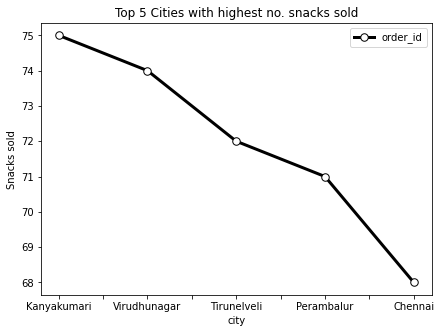

In [23]:
city_snack.plot(kind='line',color = 'black', linewidth=3, marker='.',markerfacecolor='white',markersize=15, 
                ylabel='Snacks sold', title ='Top 5 Cities with highest no. snacks sold', figsize=(7,5))

 In Kanyakumari highest number of snacks sold

#### What are the top Sub Categories according to profit? 

In [24]:
subcat_profit = supermart[['sub_category', 'profit']].groupby('sub_category').sum()
subcat_profit.sort_values('profit', ascending=False)

,profit
sub_category,
Health Drinks,267469.79
Soft Drinks,258135.97
Noodles,193685.81
Breads & Buns,190764.98
Cookies,190643.70
Chocolates,183849.34
Biscuits,169357.62
Masalas,168597.83
Edible Oil & Ghee,168593.58


The most profitable sub category is Health Drinks

<AxesSubplot:title={'center':'Sub categories wise Profit'}, ylabel='Sub category'>

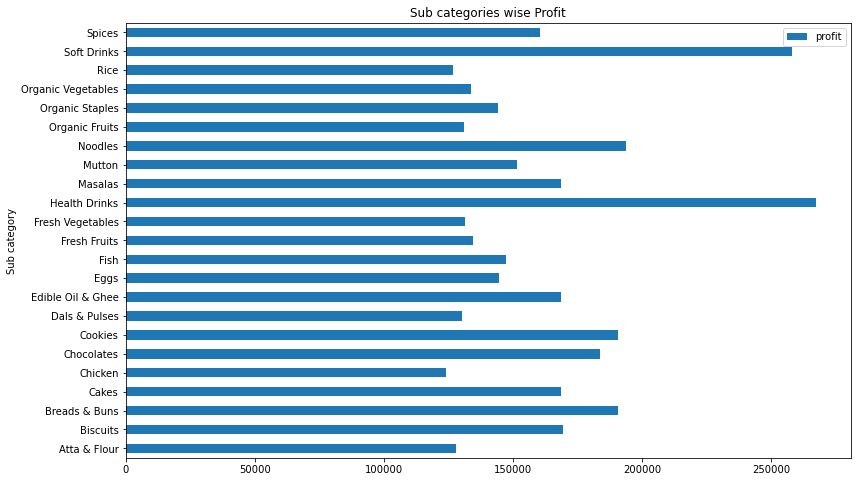

In [25]:
subcat_profit.plot(kind='barh', figsize=(13,8), title = 'Sub categories wise Profit',xlabel='Sub category')

#### Which city was the highest number of Health Drinks sold? 

In [61]:
city_health_drink= supermart.loc[supermart['sub_category']=='Health Drinks'].groupby('city').count()[['order_id']]
city_health_drink = city_health_drink.sort_values('order_id', ascending=False)[:5]
city_health_drink

,order_id
city,
Ramanadhapuram,40
Chennai,39
Ooty,38
Viluppuram,37
Tenkasi,36


<AxesSubplot:title={'center':'Top 5 Cities with highest no. of Health Drinks sold'}, xlabel='city', ylabel='Health Drinks sold'>

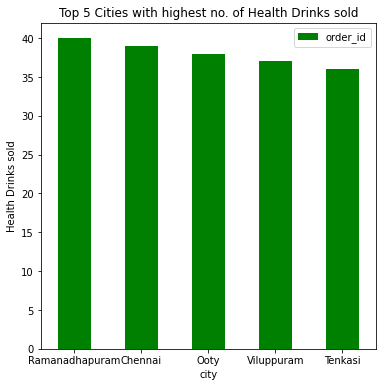

In [69]:
city_health_drink.plot(kind='bar', ylabel='Health Drinks sold', color ='green', rot=0, figsize=(6,6),
                       title ='Top 5 Cities with highest no. of Health Drinks sold')

 In Ramanadhapuram highest no. of Health Drinks sold

#### What are top 5 cities with the most sales? 

In [28]:
city_sale = supermart[['city', 'sales_price']].groupby('city').sum()
city_sale = city_sale.sort_values('sales_price', ascending=False)[0:5]
city_sale

,sales_price
city,
Kanyakumari,706764
Vellore,675296
Bodi,667177
Tirunelveli,659812
Perambalur,659738


<AxesSubplot:title={'center':'Top 5 Cities with highest sales'}, xlabel='city', ylabel='Sales'>

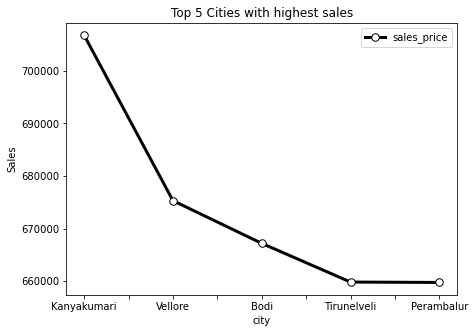

In [73]:
city_sale.plot(kind='line',color = 'black', linewidth=3, marker='.',markerfacecolor='white',markersize=15, 
                ylabel='Sales', title ='Top 5 Cities with highest sales', figsize=(7,5))

 Vellore, Bodi and Kanyakumari are the top 3 cities having highest sales

#### What are the top 5 cities with lowest sales? 

In [30]:
city_sale2 = supermart[['city', 'sales_price']].groupby('city').sum()
city_sale2 = city_sale2.sort_values('sales_price', ascending=True)[:5]
city_sale2

,sales_price
city,
Trichy,541403
Nagercoil,551435
Dharmapuri,571553
Dindigul,575631
Theni,579553


<AxesSubplot:title={'center':'Top 5 Cities with lowest sales'}, xlabel='city', ylabel='Sales'>

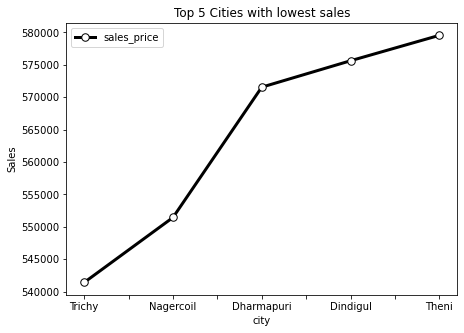

In [31]:
city_sale2.plot(kind='line',color = 'black', linewidth=3, marker='.',markerfacecolor='white',markersize=15, 
                ylabel='Sales', title ='Top 5 Cities with lowest sales', figsize=(7,5))

 Trichy, Nagercoil and Dharmapuri are the 3 cities with lowest sales

#### Top 5 customers by sales? 

In [32]:
top_customers = supermart[['customer_name', 'sales_price']].groupby('customer_name').sum()
top_customers = top_customers.sort_values('sales_price', ascending=False)[0:5]
top_customers


,sales_price
customer_name,
Krithika,334361
Amrish,333351
Verma,331665
Arutra,325720
Vidya,321798


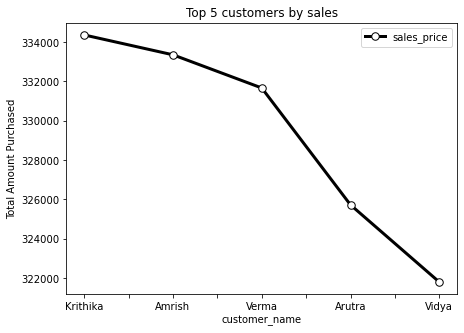

In [33]:
top_customers.plot(kind='line',color = 'black', linewidth=3, marker='.',markerfacecolor='white',markersize=15, 
                   ylabel='Total Amount Purchased', title ='Top 5 customers by sales', figsize=(7,5));

Krithika made the highest sales

#### Which customer received the most discount?

In [34]:
most_discount = supermart[['customer_name','discount']].groupby('customer_name').sum()
most_discount = most_discount.sort_values('discount',ascending=False)[0:5]
most_discount

,discount
customer_name,
Verma,52.16
Amrish,51.37
Shah,49.59
Krithika,48.64
Arutra,48.43


<AxesSubplot:title={'center':'Top 5 customers with most Discount'}, xlabel='customer_name', ylabel='Discount'>

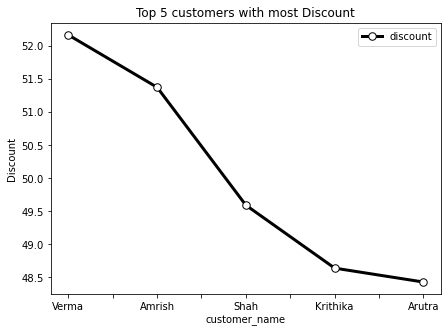

In [35]:
most_discount.plot(kind='line',color = 'black', linewidth=3, marker='.',markerfacecolor='white',markersize=15, 
                   ylabel='Discount', title ='Top 5 customers with most Discount', figsize=(7,5))


Verma received the most discount

#### Which region have the highest number of orders in the categories? 

Text(0.5, 1.0, 'Category counts by region')

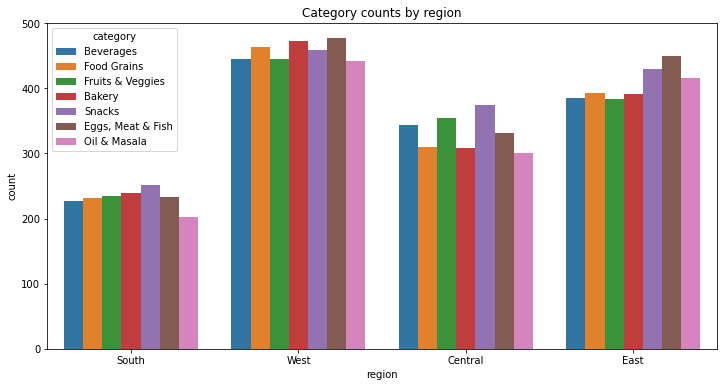

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(data=supermart, x='region', hue=supermart['category'])
plt.title('Category counts by region')

 From the bar chat we can see that the West region is the best performing region as it has the higest number of products sold for all categories.
 On the other hand the South region is not performing very well.
 

 In terms of sales Oil & Masala is the least performing category of product.


 Egg, Meat and Fish is the best perfoming category in West and East region. 

Snacks is the best perfoming category in South and Central region.

#### Which of bakery item have the most sales in west region? 

In [37]:
bakery_item =supermart.groupby('category').get_group('Bakery')
west_bakery_item = bakery_item.loc[supermart['region']=='West'].groupby('sub_category').sum()[['sales_price']]
west_bakery_item.sort_values('sales_price', ascending=False)

,sales_price
sub_category,
Breads & Buns,248972
Cakes,236306
Biscuits,229034


Breads & Buns have the most sales in west region

 #### Which month does the buisness have the highest sales? 

In [38]:
month_sales = supermart[['month','month_name','sales_price']].groupby(['month','month_name']).sum()
month_sales.sort_values('sales_price', ascending = False)

,,sales_price
month,month_name,
11,Nov,2192670
12,Dec,2088076
9,Sep,2064266
10,Oct,1243289
7,Jul,1089385
5,May,1086920
6,Jun,1057808
3,Mar,1053980
8,Aug,1046807


<AxesSubplot:title={'center':'Month wise sales'}, xlabel='Months', ylabel='Sales'>

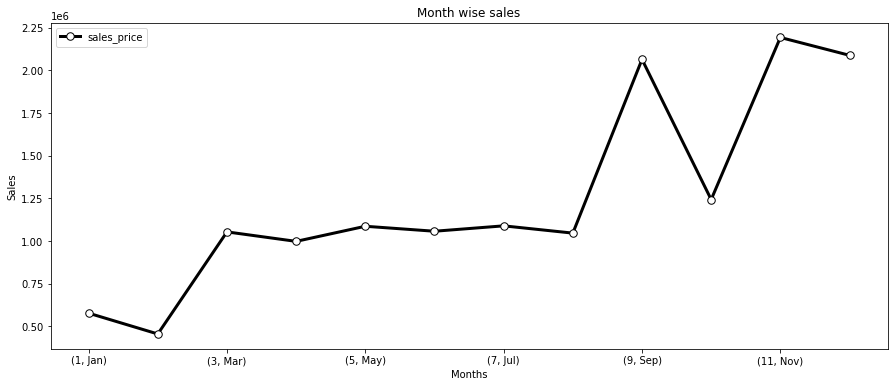

In [39]:
month_sales.plot(kind='line',color = 'black', linewidth=3, marker='.',markerfacecolor='white',markersize=15, 
                   ylabel='Sales', xlabel = 'Months', title ='Month wise sales', figsize=(15,6))

In November have the highest sales and in February have the lowest sales.

#### Which year have the most sales and  profit? 

In [40]:
year = supermart[['year','sales_price','profit']].groupby(['year']).sum()
year = year.sort_values('sales_price', ascending = False)
year               

,sales_price,profit
year,,
2018,4977512,1244182.88
2017,3870658,952814.94
2016,3131959,797192.99
2015,2975599,752529.11


<AxesSubplot:title={'center':'Year wise sales and profit'}, xlabel='Years', ylabel='Sales and Profit'>

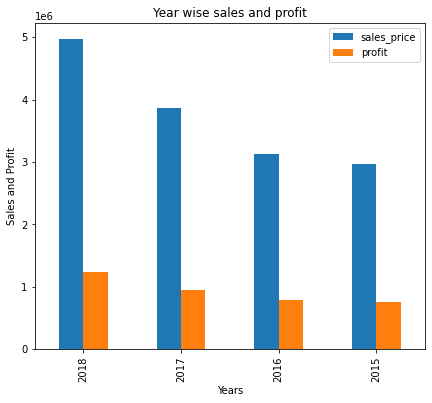

In [41]:
year.plot(kind = 'bar', xlabel = 'Years', ylabel = 'Sales and Profit', title='Year wise sales and profit',  figsize = (7,6))

In year 2018 Supermart receive the most profit with highest sales

#### Which region have the highest sales and profit ?

In [42]:
sales_by_region= supermart[['region','sales_price','profit']].groupby('region').sum().sort_values('profit', ascending=False)
sales_by_region

,sales_price,profit
region,,
West,4798743,1192004.61
East,4248368,1074345.58
Central,3468156,856806.84
South,2440461,623562.89


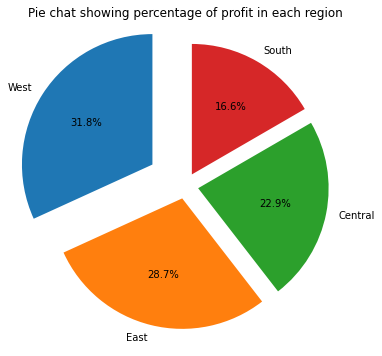

In [43]:
plt.figure(figsize=(6,6))
plt.pie(sales_by_region['profit'], labels=sales_by_region.index, autopct='%1.1f%%', startangle=90, explode=(0.3,0.1,0.1,0.1))
plt.title('Pie chat showing percentage of profit in each region')
plt.show()

West region have the highest sales and profit

# SUMMARY

The supermart is a growing and profitable business as the profit increase yearly from 2015 to 2018.

The West region is the best region where sales and profit is highest.

In cities Kanyakumari having highest sales while Trichy having lowest sales

Health Drinks and Soft Drinks having the highest profit while Chicken and Rice are the least profitable products.

Snacks is the most profitable category and Oil & Masala are the least performing category.

There is always an increase in sale in the september, november and december with November being the month with the highest sales.